<center> <h1>Stochastic Gradient Descent</h1> </center>

<h2> Descripción</h2>


<div style="text-align: justify">
    El SGD (conocido así por sus siglas) se basa en la técnica Gradient Descent, utilizada para buscar mínimos locales en una función objetivo para entrenar modelos. Dichos modelos pueden tener muchos datos de entrenamiento: miles, incluso millones; y esto puede causar un gran costo en el cálculo del gradiente de la función si se realiza de manera secuencial o por batch. La variante Stochastic se basa en la <b>aleatoriedad</b> para seleccionar minibatches de un tamaño fijo m, que es un subconjunto de los datos de entrenamiento para aproximar el gradiente. Un ejemplo de esto es la ecuación:
</div>
 
\begin{equation*} \Theta = \Theta - \alpha \nabla_{\Theta} J(\Theta; x^{(i)}, y^{(i)})\end{equation*}
<br>
<div style="text-align: justify">
    En ella se puede apreciar la función de aproximación $\Theta$, la cual busca disminuirse a ella misma, dado un grado de aprendizaje $\alpha$, realizando un cálculo de su gradiente, y utilizando la función objetivo $J$ (desconocida), que reciba como parámetros a $\Theta$, y a un par $(x,y)$ de los datos de entrenamiento, determinados en cada iteración $i$. Conforme ésta va disminuyendo, su predicción se acerca cada vez más a la función $J$, que muestra la diferencia real entre los datos.
</div>

<h2> Código </h2>
<br>
El siguiente código fue escrito por Adrian Rosebrock en el siguiente
<a href=https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/> enlace</a>. <br>
En él, explica el cómo utilizar el algoritmo con un ejemplo en Python, el cuál es el siguiente:

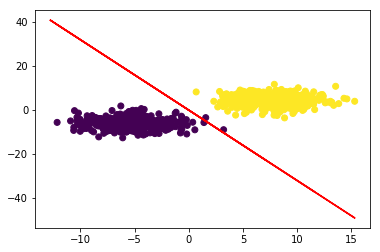

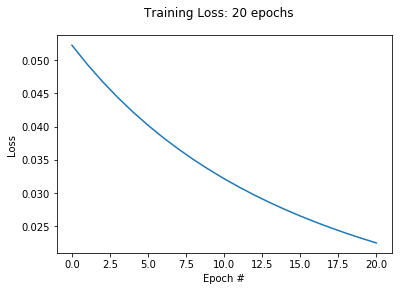

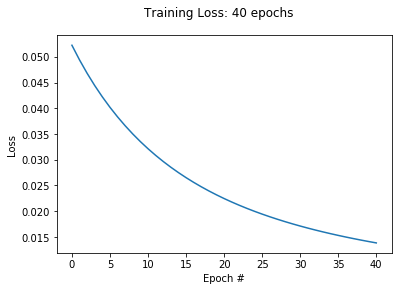

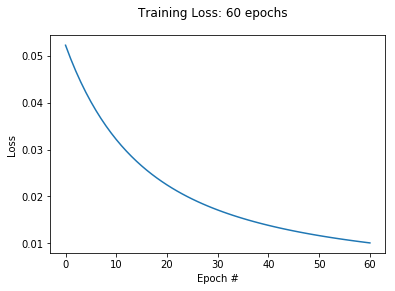

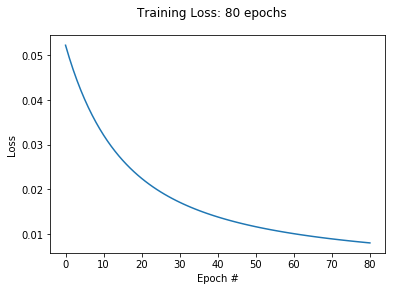

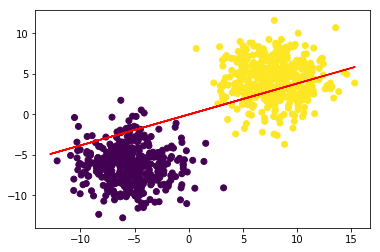

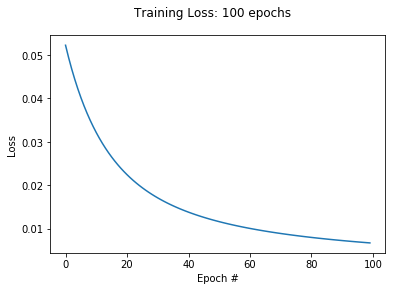

In [3]:

#Installation of needed packages#Install 
'''
import sys
!{sys.executable} -m pip install argparse
!{sys.executable} -m pip install -U scikit-learn
!{sys.executable} -m pip install numpy
!{sys.executable} python -mpip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install easydict
'''

# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse
import easydict
 
def sigmoid_activation(x):
    # compute and return the sigmoid activation value for a
    # given input value
    return 1.0 / (1 + np.exp(-x))
 
def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])
        
# construct the arguments with a dictionary
args = easydict.EasyDict({
    "epochs": 100,
    "alpha": 0.01,
    "batch_size": 32
})

# generate a 2-class classification problem with 400 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=800, n_features=2, centers=2,
    cluster_std=2.5, random_state=95)

# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]
 
# initialize our weight matrix such it has the same number of
# columns as our input features
# print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))
 
# initialize a list to store the loss value for each epoch
lossHistory = []

# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
    # initialize the total loss for the epoch
    epochLoss = []
 
    # loop over our data in batches
    for (batchX, batchY) in next_batch(X, y, args["batch_size"]):
        # take the dot product between our current batch of
        # features and weight matrix `W`, then pass this value
        # through the sigmoid activation function
        preds = sigmoid_activation(batchX.dot(W))
 
        # now that we have our predictions, we need to determine
        # our `error`, which is the difference between our predictions
        # and the true values
        error = preds - batchY
 
        # given our `error`, we can compute the total loss value on
        # the batch as the sum of squared loss
        loss = np.sum(error ** 2)
        epochLoss.append(loss)
 
        # the gradient update is therefore the dot product between
        # the transpose of our current batch and the error on the
        # # batch
        gradient = batchX.T.dot(error) / batchX.shape[0]
 
        # use the gradient computed on the current batch to take
        # a "step" in the correct direction
        W += -args["alpha"] * gradient
 
    # update our loss history list by taking the average loss
    # across all batches
    lossHistory.append(np.average(epochLoss))
    
    if epoch%20 == 0:
        Y = (-W[0] - (W[1] * X)) / W[2]
        #Y = W[0] - X*(W[2] - W[1])

        if epoch == 0:
            # plot the original data along with our line of best fit
            plt.figure()
            plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
            plt.plot(X, Y, "r-")
            continue
 
        # construct a figure that plots the loss over time
        fig = plt.figure()
        # print(epoch)
        plt.plot(np.arange(0, epoch+1), lossHistory)
        fig.suptitle("Training Loss: " + str(epoch) + " epochs")
        plt.xlabel("Epoch #")
        plt.ylabel("Loss")
        plt.show()
    
# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
#Y = (-W[0] - (W[1] * X)) / W[2]
Y = W[0] - X*(W[2] - W[1])
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")


# plot the original data along with our line of best fit
# plt.figure()
# plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
# plt.plot(X, Y, "r-")
 
# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, args["epochs"]), lossHistory)
fig.suptitle("Training Loss: 100 epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()